# Simple Liner Regression - CASE 1 (Delivery Time)

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [2]:
import math
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as sm


from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import spearmanr


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score




# Import Data

In [3]:
dt=pd.read_csv("delivery_time.csv")
dt.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dt.shape

(21, 2)

In [5]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
dt.rename(columns = {'Delivery Time' : 'DeliveryTime', 'Sorting Time' : 'SortingTime'}, inplace = True)

In [8]:
dt

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# DATA Validation and cleaning

In [9]:
# Checking for 0 values or other invalid values
dt.isna().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [10]:
missing_value=["n/a","na","NaN"]
dt1=pd.read_csv("delivery_time.csv",na_values=missing_value)

In [11]:
dt1.shape

(21, 2)

# Check if the data is Balanced and normally distributed

In [12]:
dt["SortingTime"].value_counts()

7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: SortingTime, dtype: int64

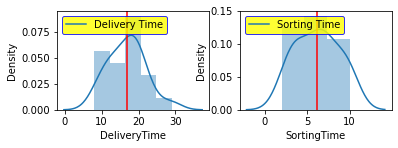

In [13]:
# Visualizing the distribution using histogram

#creating first plot 
plt.subplot(2,2,1)
DeliveryTime = sns.distplot(dt['DeliveryTime'])
plt.axvline(dt["DeliveryTime"].mean(),color='r')
plt.legend(["Delivery Time"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second plot

plt.subplot(2,2,2)
SortingTime = sns.distplot(dt['SortingTime'])
plt.axvline(dt["SortingTime"].mean(),color='r')
plt.legend(["Sorting Time"],loc='upper left',facecolor='yellow',edgecolor='blue')

#plt.show()

In [14]:
dt.skew()

DeliveryTime    0.352390
SortingTime     0.047115
dtype: float64

In [15]:
# Shappiro test to check the data normalisation for sorting time

from scipy.stats import shapiro

DataToTest=dt["SortingTime"]



stat,p = shapiro(DataToTest)

print('stat=%.2f, p=%.3f' % (stat,p))

if p > .05:
    print("Accept NUll Hypothesis: Normal Distribution")
else:
    print("Reject NUll Hypothesis:  Not normal distribution")

stat=0.94, p=0.188
Accept NUll Hypothesis: Normal Distribution


In [16]:
# Shappiro test to check the data normalisation for delivery time

from scipy.stats import shapiro

DataToTest=dt["DeliveryTime"]



stat,p = shapiro(DataToTest)

print('stat=%.2f, p=%.3f' % (stat,p))

if p > .05:
    print("Accept NUll Hypothesis: Normal Distribution")
else:
    print("Reject NUll Hypothesis:  Not normal distribution")

stat=0.98, p=0.896
Accept NUll Hypothesis: Normal Distribution


In [17]:
# K2 test to check the data normalisation 
from scipy.stats import normaltest
DataToTest=dt["SortingTime"]

stat,p = normaltest(DataToTest)

print('stat=%.2f, p=%.8f' % (stat,p))

if p > .05:
    print("Accept NUll Hypothesis: Normal Distribution")
else:
    print("Reject NUll Hypothesis:  Not normal distribution")

stat=2.71, p=0.25838373
Accept NUll Hypothesis: Normal Distribution


# Checking Correlation 

In [18]:
# Spearman and Pearseon Corelation for continous variables

from scipy.stats import spearmanr


firstsample=dt["DeliveryTime"]
secondsample=dt["SortingTime"]



stat,p = spearmanr(firstsample,secondsample)

print('stat=%.2f, p=%.8f' % (stat,p))

if p > .05:
    print("independent variables")
else:
    print("dependent variables")

stat=0.81, p=0.00001009
dependent variables


In [19]:
dt.corr(method='spearman')

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.806451
SortingTime,0.806451,1.000000


In [20]:
dt.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<AxesSubplot:>

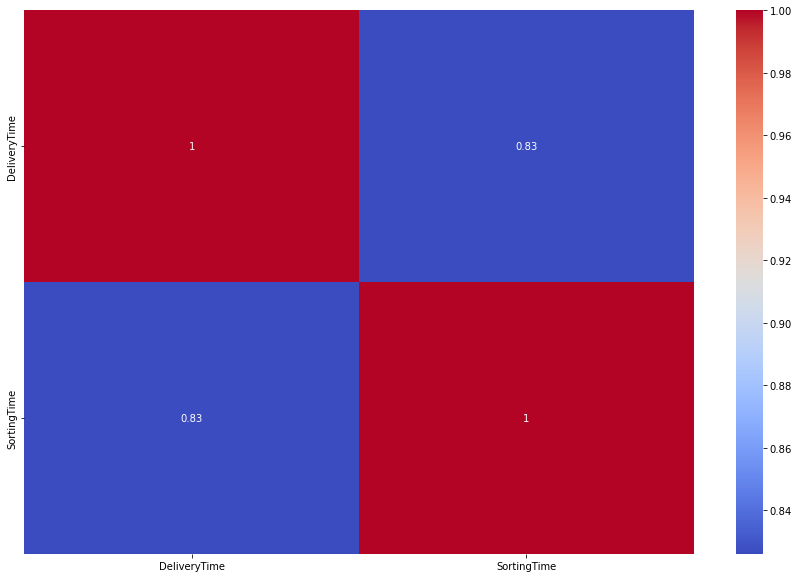

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(dt.corr(),annot=True,cmap="coolwarm")


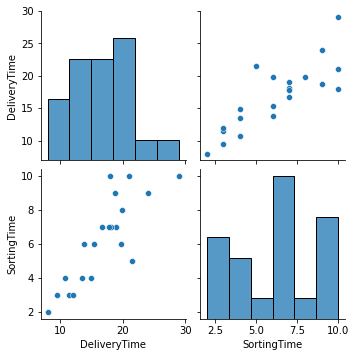

In [22]:

sns.pairplot(dt)

Text(0, 0.5, 'Delivery Time')

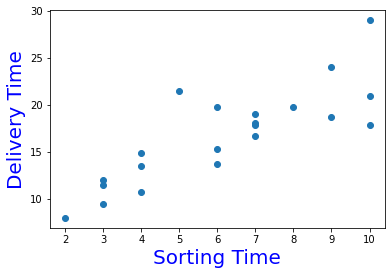

In [23]:
# plotting the scatter plot scatter plot
plt.scatter(dt["SortingTime"],dt["DeliveryTime"],label="actual")
#plt.xlabel(labels="Delivery Time",loc='center')

plt.xlabel("Sorting Time",size=20,color="blue")
plt.ylabel("Delivery Time",size=20,color="blue")




###### From the above , thre is + corelation between sorting and delivery time , i.e is the sorting time is more then delivery time also increases.

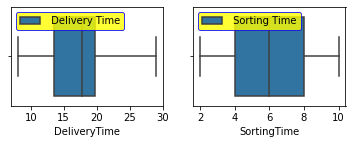

In [24]:
# Using boxplots to detect outliers

#creating first plot 
plt.subplot(2,2,1)
#graph=sns.catplot(x='DeliveryTime',kind='box',data=dt)
graph = sns.boxplot(x=dt['DeliveryTime'])
plt.legend([' Delivery Time'],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second 
plt.subplot(2,2,2)
#graph=sns.catplot(x='SortingTime',kind='box',data=dt)
graph = sns.boxplot(x=dt['SortingTime'])
plt.legend([" Sorting Time"],loc='upper left',facecolor='yellow',edgecolor='blue')

#plt.tight_layout(5) 
plt.show()

## No Outliers present

# Create Model

In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
X=dt["SortingTime"].values.reshape(-1,1)
y=dt["DeliveryTime"].values.reshape(-1,1)

In [28]:
model1 = LinearRegression()

model1.fit(X,y)

LinearRegression()

In [29]:
print (model1.coef_)# Value "a" 
print (model1.intercept_)# value "b"

[[1.6490199]]
[6.58273397]


In [30]:
y_pred=model1.predict(X)

In [31]:
y_pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

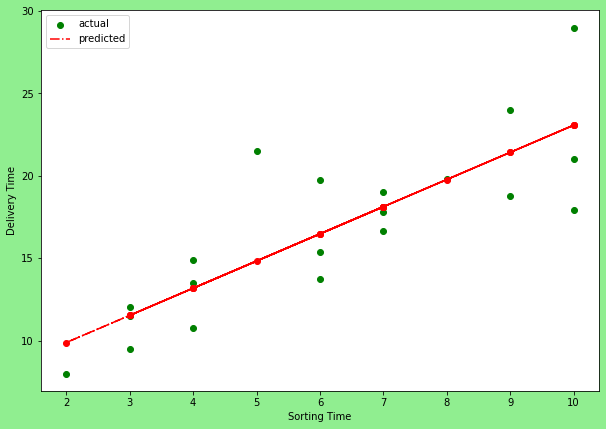

In [32]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dt["SortingTime"],dt["DeliveryTime"],color="green",label="actual")
plt.plot(dt["SortingTime"],y_pred,label="predicted",color="red",linestyle="-.");
plt.scatter(dt["SortingTime"],y_pred,color="red")
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")

plt.legend(loc="best")
plt.show()








In [33]:
r2_score(dt["DeliveryTime"],y_pred)

0.6822714748417231

# ======================================

# Creating Liner regression using Stats Model

In [34]:

model2 = sm.ols("DeliveryTime~SortingTime", data=dt).fit()

In [35]:
model2.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        08:17:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model2.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

# =========================================================

## Creating Model 3 with log(X)

In [38]:
model3= sm.ols('DeliveryTime~np.log(SortingTime)',data=dt).fit()

model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                        08:17:17   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model3.summary(),model2.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           DeliveryTime   R-squared:                       0.695
 Model:                            OLS   Adj. R-squared:                  0.679
 Method:                 Least Squares   F-statistic:                     43.39
 Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.64e-06
 Time:                        08:17:17   Log-Likelihood:                -50.912
 No. Observations:                  21   AIC:                             105.8
 Df Residuals:                      19   BIC:                             107.9
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------

### Minor improvement of R^2 value per above , Model 2=68% , model 3= 69.5%

# =======================================

## Creating Model 4 with exp(X)

In [40]:
model4= sm.ols('np.log(DeliveryTime)~SortingTime',data=dt).fit()
model4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Tue, 08 Nov 2022   Prob (F-statistic):           1.59e-06
Time:                          08:17:17   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2=68% , model 3= 69.5%, model4= 71.1% 

# ==========================================

## Create Model5 with Square 

In [41]:
dt["sort_sq"] = dt.SortingTime**2
model5 = sm.ols("DeliveryTime~SortingTime+sort_sq",data=dt).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.39e-05
Time:                        08:17:17   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.5222      4.160      0.847      0.408      -5.217      12.261
SortingTime     2.8130      1.461      1.926      0.070      -0.256       5.882
sort_sq        -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5 is similar to model 2,not adding much value 

# ================================================

## Create Model 6 

In [42]:
model6 = sm.ols("np.log(DeliveryTime)~SortingTime+sort_sq",data=dt).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Tue, 08 Nov 2022   Prob (F-statistic):           2.20e-06
Time:                          08:17:17   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime     0.2659      0.080      3.315      0.004       0.097       0.434
sort_sq        -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ### Model 6 is the best performing model so far with 76.5% result

# ==============================================

## create Model 7

In [43]:
dt["sort_cube"] = dt.SortingTime**3
model7 = sm.ols("DeliveryTime~SortingTime+sort_sq+sort_cube",data=dt).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     13.44
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           9.59e-05
Time:                        08:17:17   Log-Likelihood:                -50.633
No. Observations:                  21   AIC:                             109.3
Df Residuals:                      17   BIC:                             113.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.1582     10.987     -0.378      0.710     -27.338      19.021
SortingTime     7.5025      6.370      1.178      0.255      -5.937      20.942
sort_sq        -0.9253      1.106     -0.837      0.414      -3.258       1.407
sort_cube       0.0445      0.059      0.757      0.460      -0.079       0.168
==============================================================================
Omnibus:                        2.616   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.428
Skew:                           0.630   Prob(JB):                        0.490
Kurtosis:                       3.204   Cond. No.                     9.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 7 has a score of 70% , lower than model 6

# ==================================================

## Create Model8

In [44]:
model8 = sm.ols("np.log(DeliveryTime)~SortingTime+sort_sq+sort_cube",data=dt).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.782
Model:                              OLS   Adj. R-squared:                  0.743
Method:                   Least Squares   F-statistic:                     20.31
Date:                  Tue, 08 Nov 2022   Prob (F-statistic):           7.37e-06
Time:                          08:17:17   Log-Likelihood:                 10.748
No. Observations:                    21   AIC:                            -13.50
Df Residuals:                        17   BIC:                            -9.317
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0716      0.591      1.814      0.087      -0.175       2.318
SortingTime     0.6495      0.343      1.896      0.075      -0.073       1.372
sort_sq        -0.0809      0.059     -1.361      0.191      -0.206       0.045
sort_cube       0.0036      0.003      1.151      0.266      -0.003       0.010
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.371
Skew:                           0.260   Prob(JB):                        0.831
Kurtosis:                       2.608   Cond. No.                     9.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 8 has the the best performance thus far with 78.2%

# ===================================================

# Create Model Using Standardisation and Normalisation 

## Standardisation

In [45]:
dt.drop(["sort_sq"],axis=1,inplace=True)

In [46]:
dt.drop(["sort_cube"],axis=1,inplace=True)

In [47]:

from sklearn.preprocessing import StandardScaler
dt_array=dt.values
stanscaler_dt= StandardScaler().fit(dt_array).transform(dt_array)
stanscaler_dt

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462],
       [-0.2909489 , -0.07678123],
       [ 0.44603831,  0.32632023],
       [-1.47214757, -1.28608562],
       [ 0.22393258,  1.53562462],
       [ 0.39555973,  1.13252315],
       [ 0.61362718,  0.72942169],
       [-1.21975469, -0.88298415],
       [-0.02240287,  0.32632023],
       [-1.06831896, -1.28608562],
       [-0.96130438, -1.28608562],
       [-0.38584862, -0.88298415],
       [-0.61401178, -0.07678123],
       [ 0.26633458,  0.32632023],
       [-1.77501902, -1.68918708],
       [ 0.20979858,  0.32632023],
       [ 0.95082407, -0.47988269]])

In [48]:
import statsmodels.api as sm
X=stanscaler_dt[:,1]
y=stanscaler_dt[:,0]
model_standard=sm.OLS(X,y).fit()
model_standard.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              42.95
Date:                Tue, 08 Nov 2022   Prob (F-statistic):                    2.19e-06
Time:                        08:17:17   Log-Likelihood:                         -17.759
No. Observations:                  21   AIC:                                      37.52
Df Residuals:                      20   BIC:                                      38.56
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8260      0.126      6.553      0.000       0.563       1.089
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R^2 value is lower than the best performed model (Model 6), hence rejecting this model

# ==============================================

## Normalisaton

In [49]:
# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
dt_array=dt.values
norm_dt= MinMaxScaler().fit(dt_array).transform(dt_array)
norm_dt

array([[0.61904762, 1.        ],
       [0.26190476, 0.25      ],
       [0.55952381, 0.5       ],
       [0.76190476, 0.875     ],
       [1.        , 1.        ],
       [0.35      , 0.5       ],
       [0.52380952, 0.625     ],
       [0.07142857, 0.125     ],
       [0.47142857, 1.        ],
       [0.51190476, 0.875     ],
       [0.56333333, 0.75      ],
       [0.13095238, 0.25      ],
       [0.41333333, 0.625     ],
       [0.16666667, 0.125     ],
       [0.19190476, 0.125     ],
       [0.32761905, 0.25      ],
       [0.27380952, 0.5       ],
       [0.48142857, 0.625     ],
       [0.        , 0.        ],
       [0.46809524, 0.625     ],
       [0.64285714, 0.375     ]])

In [50]:
X=norm_dt[:,1]
y=norm_dt[:,0]
model_norm=sm.OLS(X,y).fit()
model_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              213.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):                    3.86e-12
Time:                        08:17:17   Log-Likelihood:                          6.4408
No. Observations:                  21   AIC:                                     -10.88
Df Residuals:                      20   BIC:                                     -9.837
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2115      0.083     14.620      0.000       1.039       1.384
==============================================================================
Omnibus:                        1.237   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                0.205
Skew:                           0.002   Prob(JB):                        0.902
Kurtosis:                       3.484   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
y_pred=model_norm.predict(X)
y_pred

array([1.21148363, 0.30287091, 0.60574181, 1.06004817, 1.21148363,
       0.60574181, 0.75717727, 0.15143545, 1.21148363, 1.06004817,
       0.90861272, 0.30287091, 0.75717727, 0.15143545, 0.15143545,
       0.30287091, 0.60574181, 0.75717727, 0.        , 0.75717727,
       0.45430636])

## Checking MSE amd RMSE

In [52]:
# Checking MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y,y_pred)
mse
#np.square(np.subtract(y,y_pred)).mean()

0.09703041183178597

In [53]:
# Calculating RMSE
import math
rmse = math.sqrt(mse)  
rmse


0.3114970494752494

In [54]:
model_norm.resid

array([ 0.25003395, -0.06729333, -0.17785393, -0.04803514, -0.21148363,
        0.07598073, -0.00958666,  0.03846546,  0.428872  ,  0.25483576,
        0.06753089,  0.09135333,  0.12425343, -0.07691394, -0.10748948,
       -0.14690511,  0.16828425,  0.04175717,  0.        ,  0.05791028,
       -0.4038109 ])

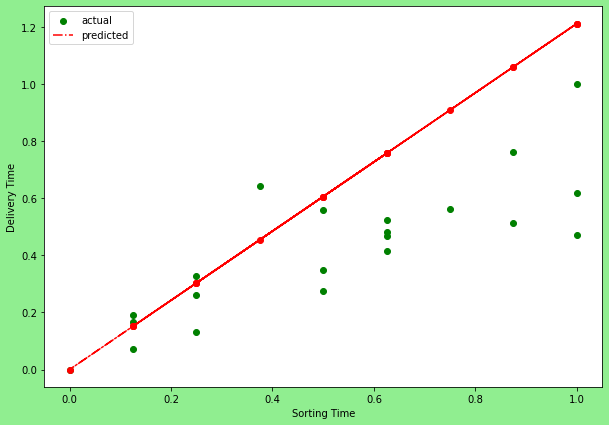

In [55]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(X,y,color="green",label="actual")
plt.plot(X,y_pred,label="predicted",color="red",linestyle="-.");
plt.scatter(X,y_pred,color="red")
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")

plt.legend(loc="best")
plt.show()





In [56]:
#creating dataframe of results of all models
results=pd.DataFrame({'Models':['raw','log(x)','exp(x)','square','cube','standardisation','normalisation'],
                        'R values':[model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model7.rsquared,model_standard.rsquared,model_norm.rsquared],
                        'RMSE':["NA","NA","NA","NA","NA","NA",rmse],
                         "MSE":["NA","NA","NA","NA","NA","NA",mse]})
results

,Models,R values,RMSE,MSE
0,raw,0.682271,NA,NA
1,log(x),0.695443,NA,NA
2,exp(x),0.710948,NA,NA
3,square,0.693440,NA,NA
4,cube,0.703432,NA,NA
5,standardisation,0.682271,NA,NA
6,normalisation,0.914435,0.311497,0.09703


# Inferences:


# From all the analysis it can be derived that we are 91% confident that Normalised (min-max scaler) model (rorm_model) is a good fit if all the conditions are met per model algo. 

# MSE value close to 0 also predicts accuracy of the model tht meets the requirement.

# Additionally, RMSE values between 0.2 and 0.5 shows that the model  relatively predict the data accuracy which meets the requirement. 

#### NOTE: only checking the MSE and RMSE for model with highest R square value.

    





